In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('f.csv')

In [11]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [14]:
vc = df['type'].value_counts()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

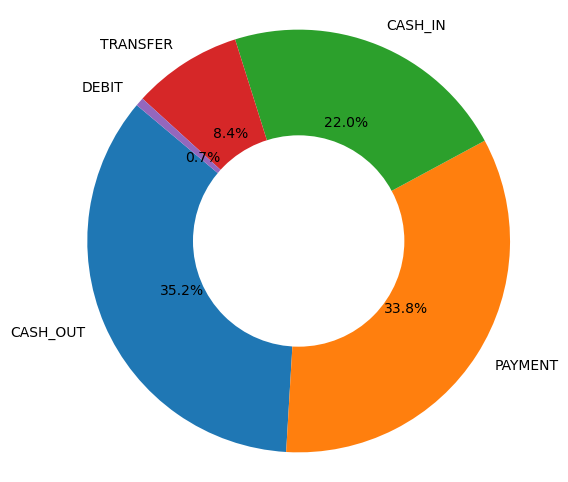

In [19]:
plt.figure(figsize=(6,6))
plt.pie(vc, labels=vc.index,autopct="%1.1f%%",startangle=140)

centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()

In [22]:
correlation = df.corr()
correlation['isFraud'].sort_values(ascending = False)

C:\Users\Hamada Salim G Trd\AppData\Local\Temp\ipykernel_4140\1977338662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

In [23]:
df['type'] = df['type'].map({'CASH_OUT':1,'PAYMENT':2,'CASH_IN':3,'TRANSFER':4,'DEBIT':5})
df['isFraud'] = df['isFraud'].map({0:'NOFRAUD',1:'FRAUD'})
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,NOFRAUD,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,NOFRAUD,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,FRAUD,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,FRAUD,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,NOFRAUD,0


In [25]:
from sklearn.model_selection import train_test_split
x=np.array(df[['type','amount','oldbalanceOrg','newbalanceOrig']])
y=np.array(df[['isFraud']])

In [26]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9997037383970754

In [27]:
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

['FRAUD']
